<h1><center>Red Wine Quality Analysis - Fitting a Statistical 
Model</center></h1>
<center>June 2024</center>
<center>Celine Ng</center>

# Table of Contents

1. Project Introduction   
    1. Libraries Installation
    1. Dataset
    1. Data Cleaning
1. EDA
    1. Distribution
        1. [Summary]
    1. Collinearity
        1. [Summary]
    1. Multicollinearity (variance inflation factor)
        1. Summary
1. Hypothesis
1. Prepare Training and Testing Data
    1. Non linear Transformation of Predictors
1. Regression
    1. Initial Model Choosing
        1. [Summary]
    1. Regression
        1. Summary
    1. Assumptions
    1. Assess fit
    1. Inferences

1. [Improvements]

# 1. Project Introduction

## 1.1 Libraries Installation

In [79]:
%%capture
%pip install -r requirements.txt

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.2 Dataset

The dataset was downloaded from kaggle, [Red Wine Quality](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009) <br>
on June 20th. The dataset is related to the red variants of the Portuguese <br>
"Vinho Verde" wine from the north of Portugal. For the original data, see <br>
[Cortez et al., 2009](http://www3.dsi.uminho.pt/pcortez/wine/).

In [81]:
redwinequality = pd.read_csv('data/winequality.csv')

In [82]:
redwinequality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Input variables obtained from physicochemical tests (continuous data): <br>
1 - fixed acidity <br>
2 - volatile acidity <br>
3 - citric acid <br>
4 - residual sugar <br>
5 - chlorides <br>
6 - free sulfur dioxide <br>
7 - total sulfur dioxide <br>
8 - density <br>
9 - pH <br>
10 - sulphates <br>
11 - alcohol <br>
<br>
Output variable (integer data): <br>
12 - quality (score between 0 and 10)

1. How big is our dataset?

In [83]:
redwinequality.shape

(1599, 12)

2. Datatypes

In [84]:
redwinequality.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

## 1.3 Data Cleaning

1. Any missing values?

In [85]:
print(redwinequality.isna().any().any())

False


2. Duplicates

In [86]:
print(redwinequality.duplicated().any())

True


In [87]:
redwinequality[redwinequality.duplicated()].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.9966,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.9978,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.9962,3.41,0.39,10.9,5


In [88]:
redwinequality[redwinequality.duplicated()].count()

fixed acidity           240
volatile acidity        240
citric acid             240
residual sugar          240
chlorides               240
free sulfur dioxide     240
total sulfur dioxide    240
density                 240
pH                      240
sulphates               240
alcohol                 240
quality                 240
dtype: int64

It is unclear if these duplicates are from the same wine or they are <br>
different wines but with very similar characteristics. For the purpose of <br>
this project, we will leave it as it is. <br>

# 2. EDA

Objective: Brief understanding of the dataset and possible relationship <br>
between columns

Dataset descriptive statistics overview

In [89]:
redwinequality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## 2.1 Distribution

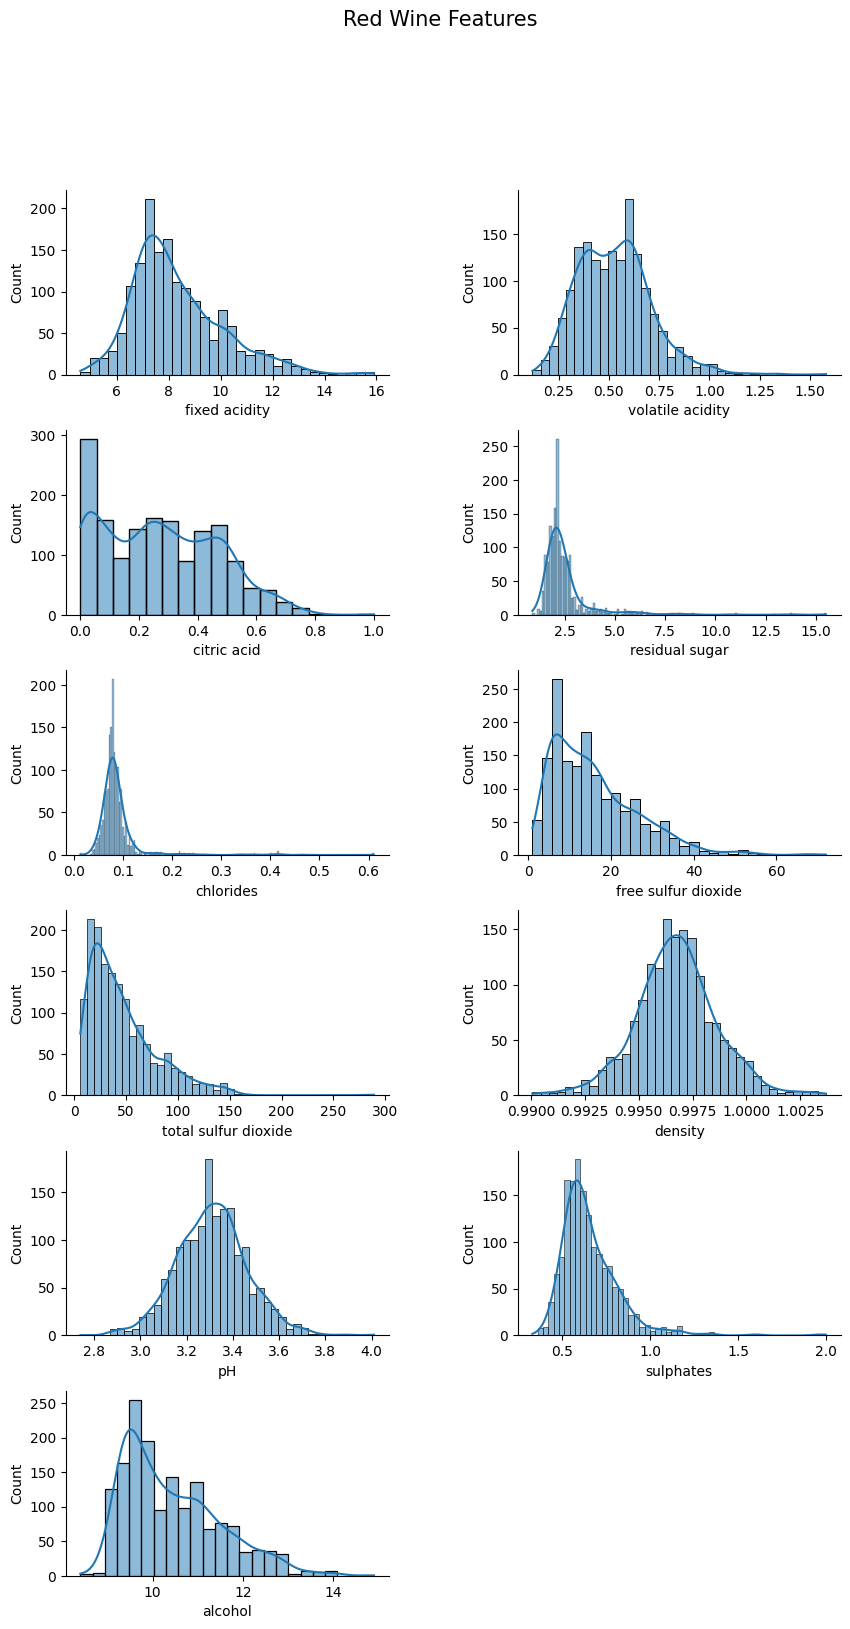

In [90]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10, 18))
fig.subplots_adjust(hspace=0.3, wspace=0.4)

axes_flatten = axes.flatten()

for i, col in enumerate(redwinequality.columns):
    if col != 'quality':
        sns.histplot(x=col, data=redwinequality, kde=True, ax=axes_flatten[i])
        sns.despine(top=True, right=True, left=False, bottom=False)
    else:
        axes_flatten[i].axis('off')
    
fig.suptitle('Red Wine Features', fontsize=15)

plt.show()

From the descriptive statistics overview and the distribution, we do confirm
 <br>
 several features contain very extreme outliers. For example, the <br>
 columns 'Residual Sugar' and 'Chlorides'.